<a href="https://colab.research.google.com/github/koad7/uol_final/blob/main/f_work_Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q fastparquet
!pip install -q pycountry
!pip install -q  transformers wikipedia
!pip install -q  qwikidata xmltodict simpledbf
!pip install -q nltk node2vec


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 36.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.8 MB/s eta 0:00:00


In [2]:
from pathlib import Path
from google.colab import drive
import os
import pandas as pd
import re
import pycountry
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import requests
import qwikidata
from bs4 import BeautifulSoup
import pickle

In [3]:
def iso3_to_iso2(iso3_code):
    country = pycountry.countries.get(alpha_3=iso3_code)
    if country:
        return country.alpha_2
    else:
        return "Unknown"


In [4]:
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DATA_DIR=Path('/content/drive/MyDrive/MSc_DATA_SCIENCE/FINAL_PROJECT/f_work/data')
WORKDIR_DIR=Path('/content/drive/MyDrive/MSc_DATA_SCIENCE/FINAL_PROJECT/f_work/')

# Donwnloads

In [6]:
import gc

In [7]:
planet_geonames=pd.read_csv(f'{DATA_DIR}/planet-latest_geonames.tsv', sep='\t')

<ipython-input-7-51eac3d99f4c>:1: DtypeWarning: Columns (10,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  planet_geonames=pd.read_csv(f'{DATA_DIR}/planet-latest_geonames.tsv', sep='\t')


In [ ]:
planet_geonames.columns

Index(['name', 'alternative_names', 'osm_type', 'osm_id', 'class', 'type',
       'lon', 'lat', 'place_rank', 'importance', 'street', 'city', 'county',
       'state', 'country', 'country_code', 'display_name', 'west', 'south',
       'east', 'north', 'wikidata', 'wikipedia', 'housenumbers'],
      dtype='object')

In [ ]:
planet_geonames.head(3)

,name,alternative_names,osm_type,osm_id,class,type,lon,lat,place_rank,importance,...,country,country_code,display_name,west,south,east,north,wikidata,wikipedia,housenumbers
0,France,"ꃔꇩ,프랑스,フランス,ፈረንሣይ,ፈረንሳይ,បារាំង,ଫ୍ରାନ୍ସ,ފަރަންސ...",relation,2202162,boundary,administrative,1.875310,46.799535,4.0,0.961223,...,France,fr,France,-5.225000,41.333000,9.550000,51.200000,Q142,fr:France,NaN
1,United States of America,"미국,ᐊᒥᐊᓕᑲ,އެމެރިކާ,የተባበሩት የአሜሪካ ግዛቶች,สหรัฐอเมริ...",relation,148838,boundary,administrative,-99.009067,36.818430,4.0,0.944692,...,United States of America,us,United States of America,144.412919,-14.760836,-64.355490,71.604822,Q30,en:United States,NaN
2,Germany,"독일,ᔮᒪᓂ,ドイツ,ጀርመን,ଜର୍ମାନୀ,ޖަރުމަނުވިލާތް,អាល្លឺម...",relation,51477,boundary,administrative,10.591708,51.185001,4.0,0.930641,...,Germany,de,Germany,5.866315,47.270111,15.041932,55.099161,Q183,de:Deutschland,NaN


In [8]:
planet_geonames_pre_sel = planet_geonames[['name', 'alternative_names', 'osm_id',
       'lon', 'lat',  'city', 'county',
       'state', 'country', 'country_code', 'display_name',  'wikidata', 'wikipedia']]

In [9]:
planet_geonames_pre_sel_1 = planet_geonames_pre_sel.dropna(subset='name',axis=0)


In [10]:
planet_geonames_pre_sel_2 = planet_geonames_pre_sel_1.dropna(subset='country',axis=0)
len(planet_geonames_pre_sel_2)


23869483

Remove countries in name

In [11]:
planet_geonames_pre_sel_3 = planet_geonames_pre_sel_2[planet_geonames_pre_sel_2['name'] != planet_geonames_pre_sel_2['country']]


In [12]:
len(planet_geonames_pre_sel_3)

23868883

In [ ]:
#planet_geonames_2 = planet_geonames_1.drop(['name','type','class','county', 'state','lat','lon','street','intermediate-region','country_code'],axis=1).rename(columns={'display_name':'name'})

In [13]:
import gc
del planet_geonames
del planet_geonames_pre_sel
del planet_geonames_pre_sel_1
del planet_geonames_pre_sel_2
gc.collect()

0

## Get then world countries by continent:
- Africa
- Antarctica
- Asia
- Europe
- North America
- South America
- Oceania

From http://www.geonames.org/countries/

In [14]:
# Read the JSON file into a dictionary
import json
countries_with_bounding_box = json.load(open(f"{DATA_DIR}/country_codes.json"))

In [15]:
# Create a DataFrame
countries_with_bounding_box = pd.DataFrame(countries_with_bounding_box).transpose()

# Set the column names
countries_with_bounding_box.columns = [
    "name",
    "alpha-2",
    "alpha-3",
    "country-code",
    "iso_3166-2",
    "region",
    "sub-region",
    "intermediate-region",
    "region-code",
    "sub-region-code",
    "intermediate-region-code",
    "dial_code",
    "geonameid",
    "capital",
    "currency",
    "language-codes",
    "area-km2",
    "gdp",
    "boundingBox"
]

# Reset the index to 0, 1, 2, ...
countries_with_bounding_box.reset_index(drop=True, inplace=True)

In [16]:
countries_with_bounding_box.head(3)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,dial_code,geonameid,capital,currency,language-codes,area-km2,gdp,boundingBox
0,Aruba,AW,ABW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,019,419,029,+297,3577279,Oranjestad,Guilder,"nl-AW,es,en",193,2516000000,"{'sw': {'lat': 12.1702998, 'lon': -70.2809842}..."
1,Afghanistan,AF,AFG,004,ISO 3166-2:AF,Asia,Southern Asia,,142,034,,+93,1149361,Kabul,Afghani,"fa-AF,ps,uz-AF,tk",647500,20650000000,"{'sw': {'lat': 29.3772, 'lon': 60.5176034}, 'n..."
2,Angola,AO,AGO,024,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,002,202,017,+244,3351879,Luanda,Kwanza,pt-AO,1246700,124000000000,"{'sw': {'lat': -18.038945, 'lon': 11.4609793},..."


In [17]:
countries_final = countries_with_bounding_box[[ 'alpha-2',  'region',
       'sub-region', 'intermediate-region',
       'capital']]

In [18]:
countries_final.rename(columns={'alpha-2':'country_code' }, inplace=True)

<ipython-input-18-4ef681d2571a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_final.rename(columns={'alpha-2':'country_code' }, inplace=True)


In [19]:
countries_final.loc[:,'country_code'] = countries_final.loc[:,'country_code'].str.lower()

<ipython-input-19-4ff55fac8891>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_final.loc[:,'country_code'] = countries_final.loc[:,'country_code'].str.lower()


In [20]:
countries_final.head(3)

,country_code,region,sub-region,intermediate-region,capital
0,aw,Americas,Latin America and the Caribbean,Caribbean,Oranjestad
1,af,Asia,Southern Asia,,Kabul
2,ao,Africa,Sub-Saharan Africa,Middle Africa,Luanda


Merging planet_geonames_pre_sel_3 to countries_with_bounding_box

513

In [21]:
planet_geonames = pd.merge(planet_geonames_pre_sel_3, countries_final , on=['country_code'])

In [22]:
del planet_geonames_pre_sel_3
del countries_final
gc.collect()

18

In [23]:
planet_geonames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23867084 entries, 0 to 23867083
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   name                 object 
 1   alternative_names    object 
 2   osm_id               int64  
 3   lon                  float64
 4   lat                  float64
 5   city                 object 
 6   county               object 
 7   state                object 
 8   country              object 
 9   country_code         object 
 10  display_name         object 
 11  wikidata             object 
 12  wikipedia            object 
 13  region               object 
 14  sub-region           object 
 15  intermediate-region  object 
 16  capital              object 
dtypes: float64(2), int64(1), object(14)
memory usage: 3.2+ GB


In [24]:
planet_geonames.to_csv(f'{DATA_DIR}/planet_geonames_clean.csv',index=False)
#planet_geonames = pd.read_csv(f'{DATA_DIR}/planet_geonames_clean.csv')
#allCountries_df_4 = pd.read_csv(f'{DATA_DIR}allCountries_df_4.csv')


Baseline data construction

In [25]:
planet_geonames_1 = planet_geonames.drop(['name','county', 'city' ,'intermediate-region','country_code'],axis=1).rename(columns={'display_name':'name'})

In [29]:
planet_geonames_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23867084 entries, 0 to 23867083
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   alternative_names  object 
 1   osm_id             int64  
 2   lon                float64
 3   lat                float64
 4   city               object 
 5   state              object 
 6   country            object 
 7   name               object 
 8   wikidata           object 
 9   wikipedia          object 
 10  region             object 
 11  sub-region         object 
 12  capital            object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ GB


In [27]:
planet_geonames_1_nona = planet_geonames_1.dropna()

In [28]:
planet_geonames_1_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70172 entries, 1 to 23848360
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   alternative_names  70172 non-null  object 
 1   osm_id             70172 non-null  int64  
 2   lon                70172 non-null  float64
 3   lat                70172 non-null  float64
 4   city               70172 non-null  object 
 5   state              70172 non-null  object 
 6   country            70172 non-null  object 
 7   name               70172 non-null  object 
 8   wikidata           70172 non-null  object 
 9   wikipedia          70172 non-null  object 
 10  region             70172 non-null  object 
 11  sub-region         70172 non-null  object 
 12  capital            70172 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 7.5+ MB


In [ ]:
del planet_geonames
gc.collect()

53

In [ ]:
planet_geonames_1['alternative_names'].fillna(planet_geonames_1['name'], inplace=True)
planet_geonames_1['city'].fillna(planet_geonames_1['name'], inplace=True)



In [32]:
def dataset_builder(df, selection_area):
  # Sample data
  # df = pd.read_csv('your_dataset.csv')

  # Initialize an empty DataFrame to store the final balanced data
  balanced_df = pd.DataFrame()

  # Calculate the minimum sample size for each region
  min_sample_size = min(df[selection_area].value_counts())

  # Loop through each region
  for region in df[selection_area].unique():
      region_df = df[df[selection_area] == region]

      # Find the number of countries in the current region
      num_countries = region_df['country'].nunique()

      # Calculate the number of samples for each country in the current region
      samples_per_country = min(min_sample_size // num_countries, region_df['country'].value_counts().min())

      # Initialize an empty DataFrame to store samples for the current region
      region_sample_df = pd.DataFrame()

      # Loop through each country in the current region
      for country in region_df['country'].unique():
          country_df = region_df[region_df['country'] == country]

          # Sample places from the current country
          country_sample_df = country_df.sample(n=min(len(country_df), samples_per_country), random_state=1)

          # Add the samples to the current region's samples
          region_sample_df = pd.concat([region_sample_df, country_sample_df])

      # Balance the regions by randomly sampling
      region_sample_df = region_sample_df.sample(min_sample_size, replace=True)

      # Add the samples for the current region to the final balanced data
      balanced_df = pd.concat([balanced_df, region_sample_df])
  balanced_df.reset_index(drop=True, inplace=True)
  return balanced_df


In [40]:
def dataset_builder_africa(region_df):
    # Initialize an empty DataFrame to store the final balanced data
    balanced_df = pd.DataFrame()

    # Find the minimum number of samples across all countries in the target region
    min_samples_per_country = region_df['country'].value_counts().min()

    # Loop through each country in the target region
    for country in region_df['country'].unique():
        # Filter the DataFrame to only include data from the current country
        country_df = region_df[region_df['country'] == country]

        # Sample places from the current country
        country_sample_df = country_df.sample(n=min(len(country_df), min_samples_per_country), random_state=1)

        # Add the samples to the final balanced data
        balanced_df = pd.concat([balanced_df, country_sample_df])

    # Reset the index
    balanced_df.reset_index(drop=True, inplace=True)

    return balanced_df

# Sample usage
# df = pd.read_csv('your_dataset.csv')
# target_region = 'Asia'
# balanced_df = dataset_builder(df, target_region)


Baseline

In [ ]:
len(planet_geonames_1)

23866675

In [33]:
planet_geonames_baseline_1 =  planet_geonames_1[['alternative_names', 'osm_id', 'city', 'state', 'country', 'name',  'region', 'sub-region', 'capital']]

In [34]:
planet_geonames_baseline_2 = planet_geonames_baseline_1.dropna()

In [35]:
planet_geonames_baseline_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791861 entries, 1 to 23860091
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   alternative_names  791861 non-null  object
 1   osm_id             791861 non-null  int64 
 2   city               791861 non-null  object
 3   state              791861 non-null  object
 4   country            791861 non-null  object
 5   name               791861 non-null  object
 6   region             791861 non-null  object
 7   sub-region         791861 non-null  object
 8   capital            791861 non-null  object
dtypes: int64(1), object(8)
memory usage: 60.4+ MB


In [36]:
baseline_world = dataset_builder(planet_geonames_baseline_2,'region')

In [37]:
len(baseline_world)

17490

In [38]:
pd.value_counts(baseline_world.region)

Europe      3498
Americas    3498
Africa      3498
Asia        3498
Oceania     3498
Name: region, dtype: int64

In [50]:
baseline_world.to_csv(f'{DATA_DIR}/prepared_data/baseline_world.csv',index=False)


'/content/drive/MyDrive/MSc_DATA_SCIENCE/FINAL_PROJECT/f_work/data/baseline_world.csv'

Baseline Africa

In [43]:
baseline_africa = dataset_builder_africa(planet_geonames_1[planet_geonames_1['region'] == 'Africa'])


In [44]:
len(baseline_africa)

4704

Wiki Selected

In [45]:
planet_geonames_1_wiki = planet_geonames_1[~planet_geonames_1['wikipedia'].isna()]

In [46]:
enriched_data_world_wiki = dataset_builder(planet_geonames_1_wiki[['alternative_names', 'osm_id', 'city', 'state', 'country', 'name', 'wikipedia', 'region', 'sub-region', 'capital']],'region')


In [47]:
len(enriched_data_world_wiki)

666

In [ ]:
enriched_data_world_africa = dataset_builder_africa(planet_geonames_1_wiki)


In [ ]:
len(enriched_data_world_africa)

214

In [ ]:
pd.value_counts(enriched_data_world_africa.country)


United Kingdom              1
Burundi                     1
Eritrea                     1
Honduras                    1
Central African Republic    1
                           ..
South Africa                1
North Korea                 1
Ireland                     1
Namibia                     1
Monaco                      1
Name: country, Length: 214, dtype: int64

In [ ]:
pd.value_counts(planet_geonames_2_wikidata_sampled_df['region'])

Europe      2365
Americas    2365
Africa      2365
Asia        2365
Oceania     2365
Name: region, dtype: int64

<Axes: >

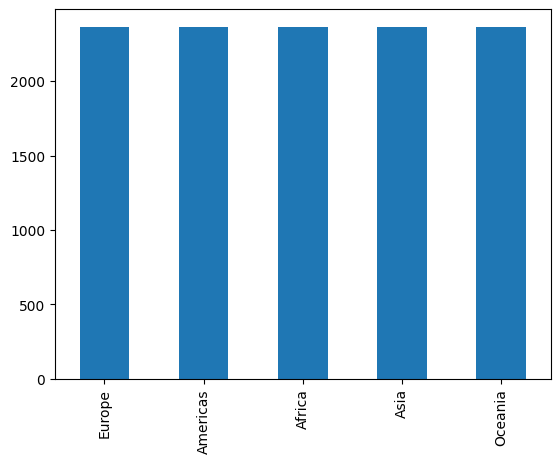

In [ ]:
pd.value_counts(planet_geonames_2_wikidata_sampled_df.region).plot.bar()


<Axes: >

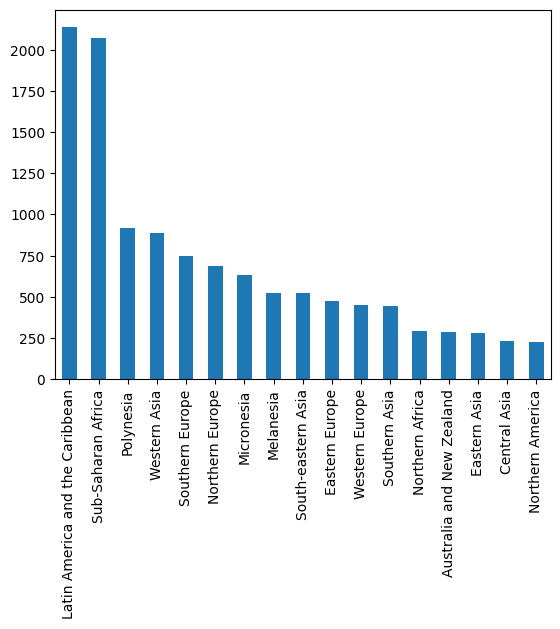

In [ ]:
pd.value_counts(planet_geonames_2_wikidata_sampled_df['sub-region']).plot.bar()

In [ ]:
chunk_size = 500000  # 500k rows at one go
chunks = []

for chunk in pd.read_csv(f'{DATA_DIR}/prepared_data/planet_geonames_clean.csv', chunksize=chunk_size):
    # Perform data filtering or transformations here
    chunks.append(chunk)

# Combine chunks back into single dataframe
planet_geonames_clean = pd.concat(chunks, axis=0)


In [8]:
intermediary_df = planet_geonames_clean[['name',  'country']]
intermediary_df.dropna(inplace=True)


intermediary_df.head()
# Group by 'country' and concatenate 'name' into a single string
grouped_df = intermediary_df.groupby(['country']).agg({
    'name': lambda x: ', '.join(x)
}).reset_index()

# Rename the 'name' column to 'related_places'
grouped_df.rename(columns={'name': 'related_places'}, inplace=True)


<ipython-input-8-55037b28f0b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intermediary_df.dropna(inplace=True)


In [9]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         217 non-null    object
 1   related_places  217 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


In [10]:
grouped_df.head()

,country,related_places
0,Afghanistan,"Kapisa, Panjshir, Nangarhar, Bamyan, Daykundi,..."
1,Albania,"Tirana Municipally, Tiranë, Bashkia Durrës, Du..."
2,Algeria,"Oran, LOTISSEMENT SAID OTBA N°1, Tamanrasset, ..."
3,Andorra,"Andorra la Vella, Andorra la Vella, Escaldes-E..."
4,Angola,"Bengo, Lobito, Bié, Moxico, Cabinda, Cunene, H..."


In [11]:
grouped_df.to_csv(f'{DATA_DIR}/prepared_data/country_related_places.csv')


## Get summary of the wikipedia pages

In [ ]:
import wikipedia
import pandas as pd
from concurrent.futures import ThreadPoolExecutor


import requests

def fetch_wiki_page(wiki_id):
    if wiki_id.isdigit():
        return "Numeric Wikipedia ID"
    elif ":" not in wiki_id:
        title = wiki_id
        lang = 'en'
    else:
        lang, title = wiki_id.split(":")[:2]
        wikipedia.set_lang(lang)

    try:
        page = wikipedia.page(title)
        return page.summary
    except wikipedia.exceptions.DisambiguationError as e:
        return "DisambiguationError"
    except wikipedia.exceptions.PageError as e:
        return "Page does not exist"
    except KeyError as e:
        return f"KeyError: {e}"
    except requests.exceptions.ConnectionError as e:
        return "ConnectionError: Could not connect to Wikipedia"





In [ ]:
# Use ThreadPoolExecutor to parallelize the fetching
with ThreadPoolExecutor() as executor:
    results_planet_ = list(executor.map(fetch_wiki_page, planet_geonames_2_wikidata_sampled_df_2['wikipedia']))
    #results_africa_gnn_df = list(executor.map(fetch_wiki_page, africa_gnn_df['wikipedia']))

# Add to DataFrame


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


WikipediaException: ignored

In [ ]:
planet_geonames_2_wikidata_sampled_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11713 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   alternative_names  11713 non-null  object
 1   osm_id             11713 non-null  int64 
 2   city               11713 non-null  object
 3   country            11713 non-null  object
 4   name               11713 non-null  object
 5   wikipedia          11713 non-null  object
 6   region             11713 non-null  object
 7   sub-region         11713 non-null  object
 8   capital            11713 non-null  object
dtypes: int64(1), object(8)
memory usage: 915.1+ KB


In [ ]:
planet_geonames_no_wiki = pd.merge(planet_geonames_2_wikidata_sampled_df_2, grouped_df, on='country').drop('wikipedia',axis=1)

In [ ]:
planet_geonames_no_wiki.head()

,alternative_names,osm_id,city,country,name,region,sub-region,capital,related_places
0,"Ringkøbing Fjord, Denmark",5536404,"Ringkøbing Fjord, Denmark",Denmark,"Ringkøbing Fjord, Denmark",Europe,Northern Europe,Copenhagen,"Skjern Å Nørrekanal, Bornholm, Fyn, Randers, R..."
1,"Ringkøbing Fjord, Denmark",5536404,"Ringkøbing Fjord, Denmark",Denmark,"Ringkøbing Fjord, Denmark",Europe,Northern Europe,Copenhagen,"Skjern Å Nørrekanal, Bornholm, Fyn, Randers, R..."
2,"Ringkøbing Fjord, Denmark",5536404,"Ringkøbing Fjord, Denmark",Denmark,"Ringkøbing Fjord, Denmark",Europe,Northern Europe,Copenhagen,"Skjern Å Nørrekanal, Bornholm, Fyn, Randers, R..."
3,"Ringkøbing Fjord, Denmark",5536404,"Ringkøbing Fjord, Denmark",Denmark,"Ringkøbing Fjord, Denmark",Europe,Northern Europe,Copenhagen,"Skjern Å Nørrekanal, Bornholm, Fyn, Randers, R..."
4,"Ringkøbing Fjord, Denmark",5536404,"Ringkøbing Fjord, Denmark",Denmark,"Ringkøbing Fjord, Denmark",Europe,Northern Europe,Copenhagen,"Skjern Å Nørrekanal, Bornholm, Fyn, Randers, R..."


In [ ]:
planet_geonames_2_wikidata_sampled_df_2.to_pickle(f'{DATA_DIR}/baseline_11713rows_16_sept.pkl')
#planet_geonames_2_wikidata_sampled_df_2.to_csv(f'{DATA_DIR}/planet_geonames_no_wiki_final_16Sept.csv')
#africa_gnn_df.to_pickle(f'{DATA_DIR}/africa_gnn_df_with_wiki_15Sept.pkl')

In [ ]:
planet_geonames_no_wiki_final = planet_geonames_2_wikidata_sampled_df_2.copy()

In [ ]:
len(planet_geonames_2_wikidata_sampled_df_2)

11713

In [ ]:
import gc
del planet_geonames_no_wiki
gc.collect()

34

In [ ]:
#select 250 by region
#planet_geonames_gnn1_graph_df_3.groupby('country').apply(lambda x: x.sample(n=min(len(x), 10), random_state=1)).reset_index(drop=True)


In [ ]:
planet_geonames_no_wiki_final.country.describe()

count       129519
unique         180
top       Thailand
freq          4389
Name: country, dtype: object

In [ ]:
planet_geonames_no_wiki_final.head(1).to_dict('records')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
planet_geonames_gnn1_graph_df_pre_graph = planet_geonames_gnn1_graph_df_final.copy()
africa_gnn_df_graph = africa_gnn_df_final.copy()

In [ ]:
def preprocess_text(text):
    #text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.split()  # Tokenize
    text = [word for word in text if word.lower() not in stop_words] # Remove stopwords
    return ' '.join(text)


# List of columns to preprocess
cols_to_preprocess = ['description', 'intermediate_region', 'display_name','alternative_names','county','sub_region','capital','city','type','place','country','state','region']

# Apply the preprocessing function
planet_geonames_gnn1_graph_df_pre_graph[cols_to_preprocess] = planet_geonames_gnn1_graph_df_pre_graph[cols_to_preprocess].applymap(preprocess_text)
africa_gnn_df_graph[cols_to_preprocess] = africa_gnn_df_graph[cols_to_preprocess].applymap(preprocess_text)



In [ ]:
planet_geonames_gnn1_graph_df_pre_graph.drop(['intermediate_region', 'class','place'],axis=1).rename(columns={'display_name':'place'})
africa_gnn_df_graph.drop(['intermediate_region', 'class','place'],axis=1).rename(columns={'display_name':'place'},inplace=True)

In [ ]:
planet_geonames_gnn1_graph_df_pre_graph_1 = planet_geonames_gnn1_graph_df_pre_graph.drop(['intermediate_region', 'class','place','latitude','longitude'],axis=1).rename(columns={'display_name':'place'})
africa_gnn_df_graph_1 = africa_gnn_df_graph.drop(['intermediate_region', 'class','place'],axis=1).rename(columns={'display_name':'place'})


In [ ]:
planet_geonames_gnn1_graph_df_pre_graph_1.head(3).to_dict('records')

[{'alternative_names': 'اسلام قلعهИсламкала',
  'osm_id': 3474080637,
  'type': 'town',
  'city': 'Islam Qala',
  'county': 'Kohsan',
  'state': 'Herat',
  'country': 'Afghanistan',
  'place': 'Islam Qala Kohsan Herat Afghanistan',
  'region': 'Asia',
  'sub_region': 'Southern Asia',
  'capital': 'Kabul',
  'description': 'Islām Qala Dari Pashto اسلام قلعه known historically Kafir Qala border town western Herat province Afghanistan near AfghanistanIran border official port entry land neighboring Taybad Iran Islam Qala administered part Islam Qala District Herat Province linked city Herat via Islam QalaHerat Highway town plays important role comes economy Afghanistan substantial volume national trade passes itIslam Qala believed population residents gradually expanded last two decades due establishment various facilities Among refugees repatriation center large number returnees processed everyday Ministry Refugees International Organization Migration IOM town Afghan Border Police nation

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

# Building Graph

## KG1 World Graph

[Graph Structure]
- Node Types:
  - Place
  - City
  - Country
  - Continent

- Relationships (Edges):
  - Place --> is_in --> City
  - City --> is_in --> Country
  - Country --> is_in --> Continent
  - Place --> alternative_name_for --> Place (for alternative names)
  - City --> capital_of --> Country
  - Place --> description_of --> Description

- Node Properties (Attributes):
  - Location:
    - Name: Zoroga
    - Longitude: 25.7985519
    - Latitude: -20.1563001
  - City:
    - Name: Ugie
    - Longitude: 28.2338889
    - Latitude: -31.1975001
    - County: Elundini Local Municipality
    - State: Eastern Cape
  - Country:
    - Name: Botswana
    - Region (Continent): Africa
  - Continent:
    - Name: Africa


In [ ]:
import networkx as nx
import pandas as pd

def create_graph_from_dataframe(df):
    KG = nx.DiGraph()

    for index, row in df.iterrows():
        place = row['place'] if not pd.isnull(row['place']) else None
        city = row['city'] if not pd.isnull(row['city']) else None
        country = row['country'] if not pd.isnull(row['country']) else None
        sub_region = row['sub_region'] if not pd.isnull(row['sub_region']) else None
        region = row['region'] if not pd.isnull(row['region']) else None


        # Add nodes only if they are not None
        if place:
            KG.add_node(place, alternative_names = row['alternative_names'], region=row['region'], osm_id=row['osm_id'], description=row['description'], labels=f'{place}')
        if city:
            KG.add_node(city, county=row['county'],region=row['region'], state=row['state'], labels=f'{city}')
        if country:
            KG.add_node(country,  capital=row['capital'],region=row['region'], labels=f'{country}')
        if sub_region:
            KG.add_node(sub_region,region=row['region'],  labels=f'{sub_region}')
        if region:
            KG.add_node(region, labels=f'{region}')

        # Add edges only between existing nodes
        if place and city and KG.has_node(place) and KG.has_node(city):
            KG.add_edge(place, city, relation="is_in", labels=f'{place} IS_IN {city}')
        if city and country and KG.has_node(city) and KG.has_node(country) and city != row['capital']:
            KG.add_edge(city, country, relation="is_in", labels=f'{city} IS_IN {country}')
        if country and sub_region and KG.has_node(country) and KG.has_node(sub_region):
            KG.add_edge(country, sub_region, relation="is_in", labels=f'{country} IS_IN {sub_region}')
        if sub_region and region and KG.has_node(sub_region) and KG.has_node(region):
            KG.add_edge(sub_region, region, relation="is_in", labels=f'{sub_region} IS_IN {region}')


    return KG

# Create the graph
KG1 = create_graph_from_dataframe(planet_geonames_gnn1_graph_df_pre_graph_1)

# Further analysis and drawing code goes here...


In [ ]:
nx.write_graphml_lxml(KG1, f"{DATA_DIR}/graphs/KG1.graphml")

## Embedding KG1
### Node2Vec

In [ ]:
# Install torch geometric
import os
import torch
torch_ver = torch.__version__
if 'IS_GRADESCOPE_ENV' not in os.environ:
  !pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-{torch_ver}.html
  !pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-{torch_ver}.html
  !pip install -q torch-geometric
  !pip install -q git+https://github.com/snap-stanford/deepsnap.git

  Preparing metadata (setup.py) ... done


In [ ]:
from node2vec import Node2Vec

# Initialize Node2Vec model
node2vec = Node2Vec(KG1, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Train Node2Vec model
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Generate embeddings
embeddings = {}
for node in KG1.nodes:
    embeddings[node] = model.wv[node]


Computing transition probabilities:   0%|          | 0/2187 [00:00<?, ?it/s]

In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

# Initialize DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
model = DistilBertModel.from_pretrained('distilbert-base-multilingual-cased')

# Initialize an empty dictionary to store embeddings
distilmbert_embeddings = {}

# Loop through each node in your graph
for node in KG1.nodes:
    # Tokenize the node text and obtain embeddings
    inputs = tokenizer(node, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Take the mean of the embeddings to get a single vector (optional)
    node_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    # Store the embedding
    distilmbert_embeddings[node] = node_embedding

# Now, 'embeddings' contains the DistilBERT embeddings for each node in your graph


In [ ]:
len(KG1.nodes)

2187

In [ ]:
from torch_geometric.data import Data
import torch
import numpy as np

def networkx_to_pyg_with_embeddings(graph, embeddings):
    # Map string nodes to integers
    node_to_int = {node: i for i, node in enumerate(graph.nodes)}

    # Convert list of numpy arrays to a single numpy array
    node_features_array = np.array([embeddings[node] for node in graph.nodes])
    node_features_tensor = torch.tensor(node_features_array, dtype=torch.float)

    # Extract edge indices and map to integers
    edge_indices = [(node_to_int[src], node_to_int[dst]) for src, dst in graph.edges]
    edge_indices_tensor = torch.tensor(edge_indices, dtype=torch.long).t().contiguous()

    # One-hot encode edge attributes
    unique_relations = list(set(nx.get_edge_attributes(graph, 'relation').values()))
    relation_to_index = {relation: i for i, relation in enumerate(unique_relations)}

    edge_features = []
    for src, dst, data in graph.edges(data=True):
        relation = data.get('relation', 'Unknown')
        relation_index = relation_to_index.get(relation, 0)
        one_hot = [0] * len(unique_relations)
        one_hot[relation_index] = 1
        edge_features.append(one_hot)

    edge_features_tensor = torch.tensor(edge_features, dtype=torch.float)

    # Create PyTorch Geometric Data object
    data = Data(x=node_features_tensor, edge_index=edge_indices_tensor, edge_attr=edge_features_tensor)

    return data

# Convert NetworkX graph to PyTorch Geometric Data
KG1_pyg_data_node2vec = networkx_to_pyg_with_embeddings(KG1, embeddings)
KG1_pyg_data_distilmbert = networkx_to_pyg_with_embeddings(KG1, distilmbert_embeddings)
KG1_data = KG1_pyg_data


TypeError: ignored

In [ ]:
distilmbert_embeddings


In [ ]:
import pickle

# Assuming KG1_pyg_data is your PyTorch Geometric Data object
with open(f"{DATA_DIR}/KG1_pyg_data.pkl", "wb") as f:
    pickle.dump(KG1_pyg_data, f)


In [ ]:
import torch

node_to_region = {}
for index, row in planet_geonames_gnn1_graph_df_pre_graph_1.iterrows():
    node_to_region[row['place']] = row['region']
    node_to_region[row['city']] = row['region']
    node_to_region[row['country']] = row['region']
    node_to_region[row['sub_region']] = row['region']
    node_to_region[row['region']] = row['region']
    # Add other types of nodes if necessary
# Get Node Names from NetworkX Graph
node_names = list(KG1.nodes())
# Create Labels Array
labels = [region_to_int[node_to_region[node]] for node in node_names]
# Add Labels to Data Object
KG1_data.y = torch.tensor(labels, dtype=torch.long)



num_nodes = len(KG1_data.y)  # Assuming KG1_data.y contains the labels for all nodes

# Create masks for training, validation and test sets
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

# Randomly sample nodes for training, validation and test sets
train_indices = torch.randperm(num_nodes)[:int(0.8 * num_nodes)]  # 80% training
val_indices = torch.randperm(num_nodes)[int(0.8 * num_nodes):int(0.9 * num_nodes)]  # 10% validation
test_indices = torch.randperm(num_nodes)[int(0.9 * num_nodes):]  # 10% test

train_mask[train_indices] = True
val_mask[val_indices] = True
test_mask[test_indices] = True

# Add these masks to your PyTorch Geometric data object
KG1_data.train_mask = train_mask
KG1_data.val_mask = val_mask
KG1_data.test_mask = test_mask


The output `Data(x=[3426, 64], edge_index=[2, 3943], edge_attr=[3943, 4])` describes a PyTorch Geometric `Data` object, which is used to represent a graph. Here's what each part means:

1. **`x=[3426, 64]`**: This indicates that your graph has 3426 nodes, each with a feature vector of size 64. These could be embeddings or other node attributes.

2. **`edge_index=[2, 3943]`**: This is a tensor that contains the indices of the source and target nodes for each edge in your graph. The tensor has shape `[2, 3943]`, meaning your graph has 3943 edges. The first row contains the source nodes, and the second row contains the target nodes for each edge.

3. **`edge_attr=[3943, 4]`**: This indicates that each of the 3943 edges has an associated feature vector of size 4. These could be one-hot encoded edge types, or other edge attributes.

In summary, your graph has:

- 3426 nodes with 64-dimensional features
- 3943 edges
- 4-dimensional edge features for each edge

This `Data` object can be used as input to graph neural network models in PyTorch Geometric.

#### GNN Layers with GAT and GraphSage

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader


In [ ]:
class myGAT(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GAT, self).__init__()
        self.conv1 = GATConv(in_channels, 8, heads=8, dropout=0.6)
        self.conv2 = GATConv(8 * 8, out_channels, heads=1, concat=False, dropout=0.6)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)



Ah, I see. If the `region` information is not directly stored in the `Data` object, you'll need to create the labels array from your original data source (likely a DataFrame or similar) where this information is available.

Here's a general outline of what you could do:

1. **Create a mapping from node names to regions**: From your original DataFrame, create a dictionary that maps each unique node name to its region.

    ```python
    node_to_region = {}
    for index, row in your_dataframe.iterrows():
        node_to_region[row['place']] = row['region']
        node_to_region[row['city']] = row['region']
        node_to_region[row['country']] = row['region']
        # Add other types of nodes if necessary
    ```

2. **Map Regions to Integers**: Create a dictionary that maps each unique region to a unique integer.

    ```python
    regions = ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
    region_to_int = {region: i for i, region in enumerate(regions)}
    ```

3. **Create Labels Array**: Create an array where the element at index `i` is the integer label for the `i-th` node in your `Data` object.

    ```python
    labels = [region_to_int[node_to_region[node]] for node in train_data['x']]
    ```

4. **Add Labels to Data Object**: Finally, add this labels array to your `Data` object.

    ```python
    train_data.y = torch.tensor(labels, dtype=torch.long)
    ```

5. **Create Training Mask**: Create a training mask to indicate which nodes should be used for training. If you want to use all nodes, you can do:

    ```python
    train_data.train_mask = torch.tensor([True] * len(labels), dtype=torch.bool)
    ```

After these steps, you should be able to proceed with the training loop. Note that you'll need to adjust the code snippets to match your actual data structure and node naming.

Create a mapping from node names to regions: From your original DataFrame, create a dictionary that maps each unique node name to its region.

In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
KG1model = myGAT(KG1_data.num_features, max(KG1_data.y).item() + 1).to(device)
KG1_data = KG1_data.to(device)
optimizer = torch.optim.Adam(KG1model.parameters(), lr=0.005, weight_decay=5e-4)


64

In [ ]:
KG1model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = KG1model(KG1_data)
    loss = F.nll_loss(out[KG1_data.train_mask], KG1_data.y[KG1_data.train_mask])
    loss.backward()
    optimizer.step()

    # Validation
    KG1model.eval()
    with torch.no_grad():
        val_loss = F.nll_loss(out[KG1_data.val_mask], KG1_data.y[KG1_data.val_mask])
    print(f'Epoch: {epoch+1}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

# Testing
KG1model.eval()
with torch.no_grad():
    test_loss = F.nll_loss(out[KG1_data.test_mask], KG1_data.y[KG1_data.test_mask])
    pred = out.argmax(dim=1)
    test_correct = pred[KG1_data.test_mask] == KG1_data.y[KG1_data.test_mask]
    test_acc = int(test_correct.sum()) / int(KG1_data.test_mask.sum())
    print(f'Test Loss: {test_loss.item()}, Test Accuracy: {test_acc}')


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

# Initialize the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Prepare the text
text = "Paris"  # Replace with the name or description of the new place
inputs = tokenizer(text, return_tensors="pt")

# Forward pass
with torch.no_grad():
    outputs = model(**inputs)

# Get the embeddings
# Using the last hidden state to represent the text
feature_vector_for_new_place = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Now, feature_vector_for_new_place is your feature vector for the new place "Paris"


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel, pipeline
import torch

# Initialize DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Initialize NER pipeline
nlp_ner = pipeline("ner")

# Your text
text = "Apple is looking at buying a startup in San Francisco for $1 billion."

# Tokenize input and get embeddings
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
with torch.no_grad():
    outputs = model(**inputs)
embeddings = outputs.last_hidden_state.squeeze(0)

# Use NER to identify entities
ner_results = nlp_ner(text)

# Filter out location entities and get their embeddings
locations = []
location_embeddings = []
for entity in ner_results:
    if entity['entity'] == 'B-LOC' or entity['entity'] == 'I-LOC':
        start = entity['start']
        end = entity['end']
        word = entity['word']
        locations.append(word)

        # Get the corresponding token ids and embeddings
        token_ids = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(word))
        for id in token_ids:
            idx = (inputs['input_ids'][0] == id).nonzero().squeeze(0).item()
            location_embeddings.append(embeddings[idx].numpy())

print("Locations:", locations)
print("Location Embeddings:", location_embeddings)


In [ ]:
mean_embedding = np.mean(location_embeddings, axis=0)


In [ ]:


# Convert to tensor and move to the same device as the KG1model
mean_embedding = torch.tensor([mean_embedding]).float().to(device)

# Model prediction
KG1model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    output = KG1model(Data(x=mean_embedding, edge_index=torch.tensor([]).to(device)))  # Assuming no edges for the random data
    prediction = output.argmax(dim=1).item()  # Get the class label as an integer

# Label mapping
int_to_region = {v: k for k, v in region_to_int.items()}  # Create a reverse mapping from integer to region
predicted_region = int_to_region[prediction]

print(f"The predicted region for the new place is {predicted_region}.")


RuntimeError: ignored

2. Evaluate the Model on Test Data

3. Make Predictions


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

#  Reads ‘alice.txt’ file
sample = open("C:\\Users\\Admin\\Desktop\\alice.txt", "utf8")
s = sample.read()

# Replaces escape character with space
f = s.replace("\n", " ")

data = []

# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []

    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())

    data.append(temp)

# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1,
                              vector_size = 100, window = 5)

# Print results
print("Cosine similarity between 'alice' " +
               "and 'wonderland' - CBOW : ",
    model1.wv.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " +
                 "and 'machines' - CBOW : ",
      model1.wv.similarity('alice', 'machines'))

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100,
                                             window = 5, sg = 1)

# Print results
print("Cosine similarity between 'alice' " +
          "and 'wonderland' - Skip Gram : ",
    model2.wv.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " +
            "and 'machines' - Skip Gram : ",
      model2.wv.similarity('alice', 'machines'))

Stanford examples

In [ ]:
import torch
import torch_scatter
import torch.nn as nn
import torch.nn.functional as F

import torch_geometric.nn as pyg_nn
import torch_geometric.utils as pyg_utils

from torch import Tensor
from typing import Union, Tuple, Optional
from torch_geometric.typing import (OptPairTensor, Adj, Size, NoneType,
                                    OptTensor)

from torch.nn import Parameter, Linear
from torch_sparse import SparseTensor, set_diag
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.utils import remove_self_loops, add_self_loops, softmax

In [ ]:
class GraphSage(MessagePassing):

    def __init__(self, in_channels, out_channels, normalize = True,
                 bias = False, **kwargs):
        super(GraphSage, self).__init__(**kwargs)

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.normalize = normalize

        self.lin_l = None
        self.lin_r = None

        self.lin_l = nn.Linear(self.in_channels, self.out_channels)
        self.lin_r = nn.Linear(self.in_channels, self.out_channels)

        self.reset_parameters()


    def reset_parameters(self):
        self.lin_l.reset_parameters()
        self.lin_r.reset_parameters()

    def forward(self, x, edge_index, size = None):

        out = None

        prop = self.propagate(edge_index, x=(x, x), size=size)
        out = self.lin_l(x) + self.lin_r(prop)
        if self.normalize:
            out = F.normalize(out, p=2)

        return out

    def message(self, x_j):

        out = None

        out = x_j

        return out

    def aggregate(self, inputs, index, dim_size = None):

        out = None

        # The axis along which to index number of nodes.
        node_dim = self.node_dim


        out = torch_scatter.scatter(inputs, index, node_dim, dim_size=dim_size, reduce='mean')

        return out

In [ ]:
class GAT(MessagePassing):

    def __init__(self, in_channels, out_channels, heads = 2,
                 negative_slope = 0.2, dropout = 0., **kwargs):
        super(GAT, self).__init__(node_dim=0, **kwargs)

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.heads = heads
        self.negative_slope = negative_slope
        self.dropout = dropout

        self.lin_l = None
        self.lin_r = None
        self.att_l = None
        self.att_r = None



        self.lin_l = nn.Linear(self.in_channels, self.out_channels * self.heads)
        ############################################################################

        self.lin_r = self.lin_l



        self.att_l = nn.Parameter(torch.zeros(self.heads, self.out_channels))
        self.att_r = nn.Parameter(torch.zeros(self.heads, self.out_channels))
        ############################################################################

        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.lin_l.weight)
        nn.init.xavier_uniform_(self.lin_r.weight)
        nn.init.xavier_uniform_(self.att_l)
        nn.init.xavier_uniform_(self.att_r)

    def forward(self, x, edge_index, size = None):

        H, C = self.heads, self.out_channels



        x_l = self.lin_l(x).reshape(-1, H, C)
        x_r = self.lin_r(x).reshape(-1, H, C)
        alpha_l = self.att_l * x_l
        alpha_r = self.att_r * x_r
        out = self.propagate(edge_index, x=(x_l, x_r), alpha=(alpha_l, alpha_r), size=size)
        out = out.reshape(-1, H*C)
        ############################################################################

        return out


    def message(self, x_j, alpha_j, alpha_i, index, ptr, size_i):



        alpha = F.leaky_relu(alpha_i + alpha_j, negative_slope=self.negative_slope)
        if ptr:
            att_weight = F.softmax(alpha_i + alpha_j, ptr)
        else:
            att_weight = torch_geometric.utils.softmax(alpha_i + alpha_j, index)
        att_weight = F.dropout(att_weight, p=self.dropout)
        out = att_weight * x_j

        ############################################################################

        return out


    def aggregate(self, inputs, index, dim_size = None):


        out = torch_scatter.scatter(inputs, index, self.node_dim, dim_size=dim_size, reduce='sum')
        ############################################################################

        return out

In [ ]:


class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, args, emb=False):
        super(GNN, self).__init__()
        conv_model = self.build_conv_model(args.model_type)
        self.convs = nn.ModuleList()
        self.convs.append(conv_model(input_dim, hidden_dim))
        assert (args.num_layers >= 1), 'Number of layers is not >=1'
        for l in range(args.num_layers-1):
            self.convs.append(conv_model(args.heads * hidden_dim, hidden_dim))

        # post-message-passing
        self.post_mp = nn.Sequential(
            nn.Linear(args.heads * hidden_dim, hidden_dim), nn.Dropout(args.dropout),
            nn.Linear(hidden_dim, output_dim))

        self.dropout = args.dropout
        self.num_layers = args.num_layers

        self.emb = emb

    def build_conv_model(self, model_type):
        if model_type == 'GraphSage':
            return GraphSage
        elif model_type == 'GAT':
            return GAT

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        for i in range(self.num_layers):
            x = self.convs[i](x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout)

        x = self.post_mp(x)

        if self.emb == True:
            return x

        return F.log_softmax(x, dim=1)

    def loss(self, pred, label):
        return F.nll_loss(pred, label)

Optimizer


In [ ]:
import torch.optim as optim

def build_optimizer(args, params):
    weight_decay = args.weight_decay
    filter_fn = filter(lambda p : p.requires_grad, params)
    if args.opt == 'adam':
        optimizer = optim.Adam(filter_fn, lr=args.lr, weight_decay=weight_decay)
    elif args.opt == 'sgd':
        optimizer = optim.SGD(filter_fn, lr=args.lr, momentum=0.95, weight_decay=weight_decay)
    elif args.opt == 'rmsprop':
        optimizer = optim.RMSprop(filter_fn, lr=args.lr, weight_decay=weight_decay)
    elif args.opt == 'adagrad':
        optimizer = optim.Adagrad(filter_fn, lr=args.lr, weight_decay=weight_decay)
    if args.opt_scheduler == 'none':
        return None, optimizer
    elif args.opt_scheduler == 'step':
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=args.opt_decay_step, gamma=args.opt_decay_rate)
    elif args.opt_scheduler == 'cos':
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=args.opt_restart)
    return scheduler, optimizer

Training and testing

In [ ]:
import time

import networkx as nx
import numpy as np
import torch
import torch.optim as optim

from torch_geometric.data import DataLoader

import torch_geometric.nn as pyg_nn

import matplotlib.pyplot as plt


def train(dataset, args):

    print("Node task. test set size:", np.sum(dataset[0]['train_mask'].numpy()))
    test_loader = loader = DataLoader(dataset, batch_size=args.batch_size, shuffle=True)

    # build model
    model = GNN(dataset.num_node_features, args.hidden_dim, dataset.num_classes,
                            args)
    scheduler, opt = build_optimizer(args, model.parameters())

    # train
    losses = []
    test_accs = []
    for epoch in range(args.epochs):
        total_loss = 0
        model.train()
        for batch in loader:
            opt.zero_grad()
            pred = model(batch)
            label = batch.y
            pred = pred[batch.train_mask]
            label = label[batch.train_mask]
            loss = model.loss(pred, label)
            loss.backward()
            opt.step()
            total_loss += loss.item() * batch.num_graphs
        total_loss /= len(loader.dataset)
        losses.append(total_loss)

        if epoch % 10 == 0:
          test_acc = test(test_loader, model)
          test_accs.append(test_acc)
          print("Epoch ", epoch, "Loss: ", total_loss, "Test Acc.: ", test_acc)
        else:
          test_accs.append(test_accs[-1])
    return test_accs, losses

def test(loader, model, is_validation=True):
    model.eval()

    correct = 0
    for data in loader:
        with torch.no_grad():
            # max(dim=1) returns values, indices tuple; only need indices
            pred = model(data).max(dim=1)[1]
            label = data.y

        mask = data.val_mask if is_validation else data.test_mask
        # node classification: only evaluate on nodes in test set
        pred = pred[mask]
        label = data.y[mask]

        correct += pred.eq(label).sum().item()

    total = 0
    for data in loader.dataset:
        total += torch.sum(data.val_mask if is_validation else data.test_mask).item()
    return correct / total

class objectview(object):
    def __init__(self, d):
        self.__dict__ = d

Training

In [ ]:
def main():
    for args in [
        {'model_type': 'GraphSage', 'dataset': 'KG1_pyg_data', 'num_layers': 2, 'heads': 1,
         'batch_size': 32, 'hidden_dim': 32, 'dropout': 0.5, 'epochs': 500,
         'opt': 'adam', 'opt_scheduler': 'none', 'opt_restart': 0,
         'weight_decay': 5e-3, 'lr': 0.01},
    ]:
        args = objectview(args)
        for model in ['GraphSage']:
            args.model_type = model

            # Match the dimension.
            if model == 'GAT':
              args.heads = 2
            else:
              args.heads = 1

            if args.dataset == 'KG1_pyg_data':
                dataset = KG1_pyg_data
            else:
                raise NotImplementedError("Unknown dataset")
            test_accs, losses = train(dataset, args)

            print("Maximum accuracy: {0}".format(max(test_accs)))
            print("Minimum loss: {0}".format(min(losses)))

            plt.title(dataset.name)
            plt.plot(losses, label="training loss" + " - " + args.model_type)
            plt.plot(test_accs, label="test accuracy" + " - " + args.model_type)
        plt.legend()
        plt.show()

In [ ]:
main()

KeyError: ignored

## KG2

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrame would go here; for example:
# planet_geonames_gnn1_graph_df_final = pd.read_csv("your_file.csv")

KG2 = nx.DiGraph()

# Loop through DataFrame rows
for index, row in planet_geonames_gnn1_graph_df_pre_graph.iterrows():
    place = row['display_name'] if not pd.isnull(row['display_name']) else None
    city = row['city'] if not pd.isnull(row['city']) else None
    country = row['country'] if not pd.isnull(row['country']) else None
    sub_region = row['sub_region'] if not pd.isnull(row['sub_region']) else None
    continent = row['region'] if not pd.isnull(row['region']) else None


    # Add nodes only if they are not None
    if place:
        KG2.add_node(place, longitude=row['longitude'], latitude=row['latitude'], osm_id=row['osm_id'], description=row['description'], labels=f'{place}')
    if city:
        KG2.add_node(city, county=row['county'], state=row['state'], labels=f'{city}')
    if country:
        KG2.add_node(country,  capital=row['capital'], labels=f'{country}')
    if sub_region:
        KG2.add_node(sub_region,  labels=f'{sub_region}')
    if continent:
        KG2.add_node(continent, labels=f'{continent}')

    # Add edges only between existing nodes
    if place and city and KG2.has_node(place) and KG2.has_node(city):
        KG2.add_edge(place, city, relation="is_in", labels=f'{place} IS_IN {city}')
    if city and country and KG2.has_node(city) and KG2.has_node(country) and city != row['capital']:
        KG2.add_edge(city, country, relation="is_in", labels=f'{city} IS_IN {country}')
    if country and sub_region and KG2.has_node(country) and KG2.has_node(sub_region):
        KG2.add_edge(country, sub_region, relation="is_in", labels=f'{country} IS_IN {sub_region}')
    if  sub_region and continent and KG2.has_node(sub_region) and KG2.has_node(continent):
        KG2.add_edge(sub_region, continent, relation="is_in", labels=f'{sub_region} IS_IN {continent}')
    if place and row.get('alternative_names') and KG2.has_node(place):
        alternative_names = row['alternative_names'].split(',')
        for alt in alternative_names:
            if alt.strip():
                KG2.add_edge(place, alt.strip(), relation="alternative_name_for", labels=f'{alt.strip()} ALTERNATIVE_NAME_FOR {place}')
    if city and country and row['capital'] == city and KG2.has_node(city) and KG2.has_node(country):
        KG2.add_edge(city, country, relation="capital_of", labels=f'{city} CAPITAL_OF {country}')
    if place and row.get('description') and KG2.has_node(place):
        KG2.add_edge(place, row['description'], relation="description_of", labels=f'DESCRIPTION_OF {place}')

# Further analysis and drawing code goes here...


In [ ]:
planet_geonames_gnn1_graph_df_pre_graph.head()

,place,alternative_names,osm_id,class,type,longitude,latitude,city,county,state,country,display_name,region,sub_region,intermediate_region,capital,description
0,almar,alaqadariialmar almar bazar,312995280,place,town,64.578235,35.849121,almar,almar,faryab,afghanistan,almar almar faryab afghanistan,asia,southern asia,,kabul,almar persian المار district southwestern part...
1,khaki jabbar,khaki jabbar,3882124226,place,village,69.504140,34.401762,khaki jabbar,khaki jabbar,kabul,afghanistan,khaki jabbar khaki jabbar kabul afghanistan,asia,southern asia,,kabul,khaki jabbar village center khaki jabbar distr...
2,murghab مرغاب,murghab مرغاب,313003996,place,town,63.338952,35.569548,murghab مرغاب,murghab,badghis,afghanistan,murghab مرغاب murghab badghis afghanistan,asia,southern asia,,kabul,bala murghab pashtopersian bala murġāb distric...
3,arghestan,arghastanarghistanarghestanarghastanarghistanا...,4402908625,place,town,66.517354,31.569863,arghestan,arghistan,kandahar,afghanistan,arghestan arghistan kandahar afghanistan,asia,southern asia,,kabul,village arghistan also arghestan arghastan hea...
4,miranzai,miranzaiمیرانزاعی,4385967406,place,village,63.286045,35.671816,miranzai,murghab,badghis,afghanistan,miranzai murghab badghis afghanistan,asia,southern asia,,kabul,miranzai village badghis province north wester...


In [ ]:
nx.write_graphml_lxml(KG2, f"{DATA_DIR}/graphs/KG2.graphml")

## Analyse

In [ ]:
num_nodes = KG1.number_of_nodes()
num_edges = KG1.number_of_edges()
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Ratio edges to nodes: {round(num_edges / num_nodes, 2)}')

Number of nodes: 4965
Number of edges: 6574
Ratio edges to nodes: 1.32


In [ ]:
degree_centrality = nx.degree_centrality(KG1)


##### Visualize node centrality measures


### Create Embeddings


In [ ]:
from node2vec import Node2Vec

# Generate node embeddings using node2vec
node2vec = Node2Vec(KG1, dimensions=128, walk_length=30, num_walks=200, workers=4) # You can adjust these parameters
model = node2vec.fit(window=10, min_count=1, batch_words=4) # Training the model

# Visualize node embeddings using t-SNE
from sklearn.manifold import TSNE
import numpy as np

# Get embeddings for all nodes
embeddings = np.array([model.wv[node] for node in KG1.nodes()])

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=10, n_iter=400)
embeddings_2d = tsne.fit_transform(embeddings)

# Visualize embeddings in 2D space with node labels
plt.figure(figsize=(12, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', alpha=0.7)


## Embedding the Graph

### KG1

In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.7 MB/s eta 0:00:00


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

# Initialize the DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

def get_distilbert_embedding(text):
    # Tokenize input text and obtain output from DistilBERT
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)

    # Average the embeddings (over the sequence length)
    # The size of `outputs` is (batch_size, sequence_length, hidden_dim), here batch_size is 1
    # We take mean over the sequence length to get one fixed size vector per batch element (i.e., per text)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

# Example
text = "Your description here"
embedding = get_distilbert_embedding(text)


In [ ]:
place_embedding =[]
city_embedding  =[]
capital_embedding=[]
country_embedding  =[]
county_embedding=[]
state_embedding=[]
continent_embedding =[]
sub_region_embedding=[]
description_embedding=[]
alternative_names=[]
latitude=[]
longitude=[]


In [ ]:
import torch
import multiprocessing as mp
from torch_geometric.data import Data
from sklearn.preprocessing import StandardScaler
from transformers import DistilBertTokenizer, DistilBertModel

# Initialize DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

def get_batched_distilbert_embedding(text_list):
    inputs = tokenizer(text_list, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

# Initialize lists
feature_names = ['longitude', 'latitude', 'osm_id']
features_dict = {name: [] for name in feature_names}
text_feature_names = ['place', 'city', 'county', 'state', 'capital', 'continent', 'sub_region', 'alternative_names', 'description']
text_features_dict = {name: [] for name in text_feature_names}

# Gather data for batching
for node in KG1.nodes(data=True):
    attributes = node[1]

    # Numerical attributes
    for name in feature_names:
        features_dict[name].append(attributes.get(name, 0))

    # Textual attributes for embeddings
    for name in text_feature_names:
        text_features_dict[name].append(attributes.get(name, ""))

# Standardize numerical features
scaler = StandardScaler()
for name, vals in features_dict.items():
    features_dict[name] = scaler.fit_transform([vals])

# Generate batched embeddings for text features
batch_size = 64  # you can adjust this based on your available memory
for name, texts in text_features_dict.items():
    text_features_dict[name] = []
    for i in range(0, len(texts), batch_size):
        text_batch = texts[i:i+batch_size]
        embeddings = get_batched_distilbert_embedding(text_batch)
        text_features_dict[name].extend(embeddings.tolist())

# Now you can collate these features to create PyTorch Geometric Data objects
# ...


KeyboardInterrupt: ignored

Edges

In [ ]:
# Initialize lists for edge features
edge_index = []
edge_relation_embedding = []
edge_labels_embedding = []

# Loop through each edge to prepare features
for u, v, attributes in KG1.edges(data=True):
    edge_relation = attributes.get('relation', '')
    edge_labels = attributes.get('labels', '')

    # For text data like 'relation' and 'labels', convert them to embeddings
    # Here I'm using placeholders; you should replace this with actual embeddings
    edge_relation_embedding.append(get_distilbert_embedding(edge_relation).squeeze().tolist())  # Replace with actual embeddings
    edge_labels_embedding.append(get_distilbert_embedding(edge_labels).squeeze().tolist())  # Replace with actual embeddings

    # Prepare edge_index for PyTorch Geometric Data
    # Note: The node names should be mapped to integer indices before creating edge_index
    u_index = node_to_index_map[u]  # Assume node_to_index_map maps node names to integer indices
    v_index = node_to_index_map[v]  # Assume node_to_index_map maps node names to integer indices
    edge_index.append([u_index, v_index])

# Convert edge_index to a torch tensor
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

# Create PyTorch Geometric Data
data = Data(x=x,  # Node features
            edge_index=edge_index,  # Edge indices
            edge_attr=edge_relation_embedding)  # Edge features

# Add other edge features, if necessary, similar to edge_relation_embedding


Install PyTorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
# Iterate through all nodes and set default values for missing attributes
default_values = {'node_type': ' ', 'osm_id': ' ', 'latitude': ' ',
                  'longitude': ' ', 'description': ' ', 'capital': ' '}

for node in KG1.nodes():
    for attr, default_value in default_values.items():
        if attr not in KG1.nodes[node]:
            KG1.nodes[node][attr] = default_value

# Now try converting it to a PyTorch Geometric data object
from torch_geometric.utils import from_networkx
pyg_kg1 = from_networkx(KG1)


In [ ]:
for node in KG1.nodes:
  print(KG1.nodes[node]['description'])

ValueError: ignored

## Continental Classifier (GNN1):
A lightweight GNN built on a subsampled KGE that encompasses information on world geographic places. This model is enriched with attributes like place names, countries, capital cities, and Wikipedia summaries.